In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import scipy.stats as st
from scipy.stats import linregress

In [2]:
happy_2015 = "Resources/2015.csv"
happy_2016 = "Resources/2016.csv"
happy_2017 = "Resources/2017.csv"
happy_2018 = "Resources/2018.csv"
happy_2019 = "Resources/2019.csv"

happy_2015_df = pd.read_csv(happy_2015)
happy_2016_df = pd.read_csv(happy_2016)
happy_2017_df = pd.read_csv(happy_2017)
happy_2018_df = pd.read_csv(happy_2018)
happy_2019_df = pd.read_csv(happy_2019)

In [3]:
# JOIN THE DATA

#Create joins to merge file into single dataframe, with an added column for year
happy_2015_df['Year'] = "2015"
happy_2016_df['Year'] = "2016"
happy_2017_df['Year'] = "2017"
happy_2018_df['Year'] = "2018"
happy_2019_df['Year'] = "2019"


In [4]:
happy_2018_df.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Year'],
      dtype='object')

In [5]:
# happy_2016_df.columns
# happy_2017_df.columns
# happy_2018_df.columns
# happy_2019_df.columns

In [6]:
#Remove unused columns not common across datasets
happy_15_cleaned = happy_2015_df.drop(columns=['Standard Error', 'Family', 'Dystopia Residual'])
happy_16_cleaned = happy_2016_df.drop(columns=['Lower Confidence Interval', 'Upper Confidence Interval', 'Family', 'Dystopia Residual'])
happy_17_cleaned = happy_2017_df.drop(columns=['Whisker.high','Whisker.low', 'Family', 'Dystopia.Residual'])
happy_18_cleaned = happy_2018_df.drop(columns=['Social support'])
happy_19_cleaned = happy_2019_df.drop(columns=['Social support'])

#Remove Standard Error
#drop family
#drop Dystopia Residual

In [7]:
#Rename columns to match across datasets
happy_17_cleaned = happy_17_cleaned.rename(columns={"Happiness.Rank": "Happiness Rank", "Happiness.Score": "Happiness Score", "Economy..GDP.per.Capita.": "Economy (GDP per Capita)", "Health..Life.Expectancy.": "Health (Life Expectancy)", "Trust..Government.Corruption.":"Trust (Government Corruption)", "Dystopia.Residual":"Dystopia Residual" })
happy_18_cleaned = happy_18_cleaned.rename(columns={"Overall rank": "Happiness Rank", "Score": "Happiness Score", "GDP per capita":"Economy (GDP per Capita)", "Healthy life expectancy":"Health (Life Expectancy)", "Freedom to make life choices":"Freedom","Perceptions of corruption":"Trust (Government Corruption)", "Country or region":"Country"})
happy_19_cleaned = happy_19_cleaned.rename(columns={"Overall rank": "Happiness Rank", "Score": "Happiness Score", "GDP per capita":"Economy (GDP per Capita)", "Healthy life expectancy":"Health (Life Expectancy)", "Freedom to make life choices":"Freedom","Perceptions of corruption":"Trust (Government Corruption)", "Country or region":"Country"})

In [8]:
happy_15_cleaned.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Year'],
      dtype='object')

In [9]:
#Adding Regions to datasets missing information
#2018 & 2019 only contain countries, not regions. If we aren't using regions, remove them. 
#If we are, then add a for loop to add region based on country

In [10]:
# Merge two dataframes using an outer join
# df.rename(columns={"A": "a", "B": "b", "C": "c"}, errors="raise")


happy1516 = happy_15_cleaned.append(happy_16_cleaned)
happy151617 = happy1516.append(happy_17_cleaned)
happy15161718 = happy151617.append(happy_18_cleaned)
full_data_df = happy15161718.append(happy_19_cleaned)

full_data_df

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,Western Europe,1,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,2,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,Western Europe,3,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,4,7.522,1.45900,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,5,7.427,1.32629,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...
151,Rwanda,NaN,152,3.334,0.35900,0.61400,0.55500,0.41100,0.21700,2019
152,Tanzania,NaN,153,3.231,0.47600,0.49900,0.41700,0.14700,0.27600,2019
153,Afghanistan,NaN,154,3.203,0.35000,0.36100,0.00000,0.02500,0.15800,2019
154,Central African Republic,NaN,155,3.083,0.02600,0.10500,0.22500,0.03500,0.23500,2019


In [12]:
#CLEAN THE DATA: Aline, Susan

#Inspect columns to see if row counts match up
#Is object type pulling in as number? If not, change to numbers
#Run a groupby for country to check for typos
#Check for and handle NaN and null fields *as appropriate*

null_values = full_data_df.isnull()
row_has_NaN = null_values.any(axis=1)
rows_with_NaN = full_data_df[row_has_NaN]

print(rows_with_NaN)

#Only NaN value is row 19 - UAE corruption. Will scrub row from corruption DF.


                      Country Region  Happiness Rank  Happiness Score  \
0                      Norway    NaN               1            7.537   
1                     Denmark    NaN               2            7.522   
2                     Iceland    NaN               3            7.504   
3                 Switzerland    NaN               4            7.494   
4                     Finland    NaN               5            7.469   
..                        ...    ...             ...              ...   
151                    Rwanda    NaN             152            3.334   
152                  Tanzania    NaN             153            3.231   
153               Afghanistan    NaN             154            3.203   
154  Central African Republic    NaN             155            3.083   
155               South Sudan    NaN             156            2.853   

     Economy (GDP per Capita)  Health (Life Expectancy)   Freedom  \
0                    1.616463                  0.79666

In [13]:
#How many years does the country exist in the data?
full_data_df["Country"].value_counts()

Jordan                     5
Canada                     5
Mongolia                   5
Myanmar                    5
Algeria                    5
                          ..
Oman                       1
Hong Kong S.A.R., China    1
North Macedonia            1
Djibouti                   1
Puerto Rico                1
Name: Country, Length: 170, dtype: int64

In [14]:
#pulling list of country names to find name differences between years

full_data_df['Country'] = full_data_df.replace({"Trinidad & Tobago": "Trinidad and Tobago", 
                                                "Taiwan Province of China": "Taiwan",
                                                "Somaliland region": "Somaliland Region",
                                                "Hong Kong S.A.R., China": "Hong Kong",
                                                "North Cyprus": "Northern Cyprus"})
                                                


full_data_df.sort_values(by='Country')
df_unique = full_data_df['Country'].unique()
alpha = pd.DataFrame(df_unique)
alpha = alpha.sort_values(by=0, ascending = True)
pd.set_option("display.max_rows", None)
alpha

,0
152,Afghanistan
94,Albania
67,Algeria
136,Angola
29,Argentina
126,Armenia
9,Australia
12,Austria
79,Azerbaijan
48,Bahrain


In [15]:
#Rename columns to match across datasets
full_data_df

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,Western Europe,1,7.587,1.396510,0.941430,0.665570,0.419780,0.296780,2015
1,Iceland,Western Europe,2,7.561,1.302320,0.947840,0.628770,0.141450,0.436300,2015
2,Denmark,Western Europe,3,7.527,1.325480,0.874640,0.649380,0.483570,0.341390,2015
3,Norway,Western Europe,4,7.522,1.459000,0.885210,0.669730,0.365030,0.346990,2015
4,Canada,North America,5,7.427,1.326290,0.905630,0.632970,0.329570,0.458110,2015
5,Finland,Western Europe,6,7.406,1.290250,0.889110,0.641690,0.413720,0.233510,2015
6,Netherlands,Western Europe,7,7.378,1.329440,0.892840,0.615760,0.318140,0.476100,2015
7,Sweden,Western Europe,8,7.364,1.331710,0.910870,0.659800,0.438440,0.362620,2015
8,New Zealand,Australia and New Zealand,9,7.286,1.250180,0.908370,0.639380,0.429220,0.475010,2015
9,Australia,Australia and New Zealand,10,7.284,1.333580,0.931560,0.651240,0.356370,0.435620,2015


In [16]:
# for x in Country:
#     if region = "NaN":
#         if year = "2018"

country_regions = pd.DataFrame(full_data_df.groupby('Country').first()[["Region"]].reset_index())
full_data_df = pd.merge(full_data_df.drop("Region", axis = 1), country_regions, how = "left")
#first command, grab first region, then do a merge and take first region and overwrite what is currentl there
#will create df of just country and region
full_data_df

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,Region
0,Switzerland,1,7.587,1.396510,0.941430,0.665570,0.419780,0.296780,2015,Western Europe
1,Iceland,2,7.561,1.302320,0.947840,0.628770,0.141450,0.436300,2015,Western Europe
2,Denmark,3,7.527,1.325480,0.874640,0.649380,0.483570,0.341390,2015,Western Europe
3,Norway,4,7.522,1.459000,0.885210,0.669730,0.365030,0.346990,2015,Western Europe
4,Canada,5,7.427,1.326290,0.905630,0.632970,0.329570,0.458110,2015,North America
5,Finland,6,7.406,1.290250,0.889110,0.641690,0.413720,0.233510,2015,Western Europe
6,Netherlands,7,7.378,1.329440,0.892840,0.615760,0.318140,0.476100,2015,Western Europe
7,Sweden,8,7.364,1.331710,0.910870,0.659800,0.438440,0.362620,2015,Western Europe
8,New Zealand,9,7.286,1.250180,0.908370,0.639380,0.429220,0.475010,2015,Australia and New Zealand
9,Australia,10,7.284,1.333580,0.931560,0.651240,0.356370,0.435620,2015,Australia and New Zealand


# DATAFRAMES: 

Meghan & Tom

Potential Questions:
How strong is the relationship between Happiness Rank and GDP per capita?How does that compare to the relationship of Happiness Rank to Generosity? 
Is there a relationship between Generosity and GDP per capita?

The r-squared is: nan


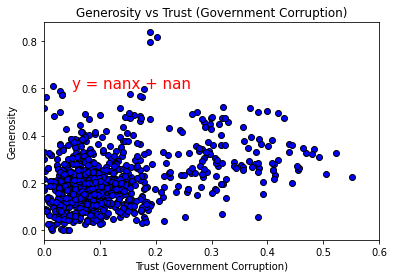

In [61]:
x_values = full_data_df['Trust (Government Corruption)']
y_values = full_data_df['Generosity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="blue",
           edgecolors ="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.05,0.6),fontsize=15,color="red")
plt.title('Generosity vs Trust (Government Corruption)')
plt.xlabel('Trust (Government Corruption)')
plt.ylabel('Generosity')
plt.xlim(0,0.6)
print(f"The r-squared is: {rvalue**2}")
# plt.savefig("../output_data/fig5.png")
plt.show()

The r-squared is: 0.3038853857695216


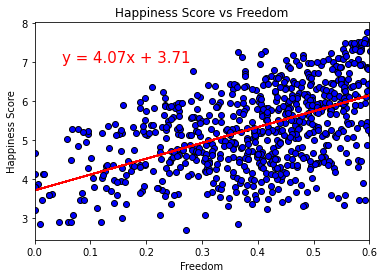

In [51]:
x_values = full_data_df['Freedom']
y_values = full_data_df['Happiness Score']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="blue",
           edgecolors ="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.05,7),fontsize=15,color="red")
plt.title('Happiness Score vs Freedom')
plt.xlabel('Freedom')
plt.ylabel('Happiness Score')
plt.xlim(0,0.6)
print(f"The r-squared is: {rvalue**2}")
# plt.savefig("../output_data/fig5.png")
plt.show()

The r-squared is: 0.11610724375203527


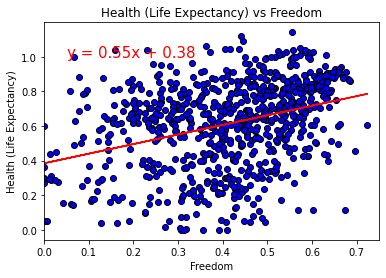

In [58]:
x_values = full_data_df['Freedom']
y_values = full_data_df['Health (Life Expectancy)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="blue",
           edgecolors ="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.05,1),fontsize=15,color="red")
plt.title('Health (Life Expectancy) vs Freedom')
plt.xlabel('Freedom')
plt.ylabel('Health (Life Expectancy)')
plt.xlim(0,0.75)
print(f"The r-squared is: {rvalue**2}")
# plt.savefig("../output_data/fig5.png")
plt.show()

The r-squared is: nan


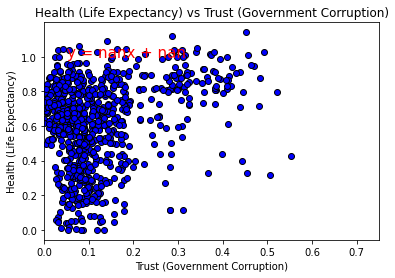

In [59]:
x_values = full_data_df['Trust (Government Corruption)']
y_values = full_data_df['Health (Life Expectancy)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="blue",
           edgecolors ="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.05,1),fontsize=15,color="red")
plt.title('Health (Life Expectancy) vs Trust (Government Corruption)')
plt.xlabel('Trust (Government Corruption)')
plt.ylabel('Health (Life Expectancy)')
plt.xlim(0,0.75)
print(f"The r-squared is: {rvalue**2}")
# plt.savefig("../output_data/fig5.png")
plt.show()

The r-squared is: 0.5512405291325078


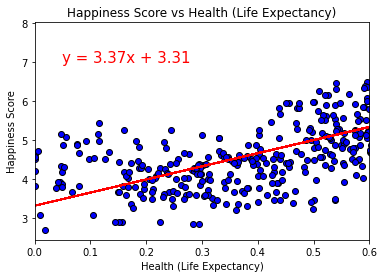

In [52]:
x_values = full_data_df['Health (Life Expectancy)']
y_values = full_data_df['Happiness Score']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="blue",
           edgecolors ="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.05,7),fontsize=15,color="red")
plt.title('Happiness Score vs Health (Life Expectancy)')
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Happiness Score')
plt.xlim(0,0.6)
print(f"The r-squared is: {rvalue**2}")
# plt.savefig("../output_data/fig5.png")
plt.show()

The r-squared is: nan


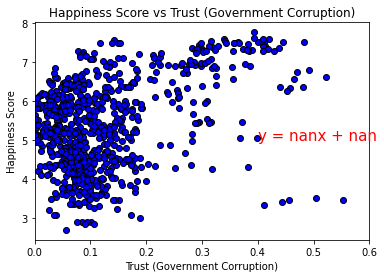

In [45]:
x_values = full_data_df['Trust (Government Corruption)']
y_values = full_data_df['Happiness Score']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="blue",
           edgecolors ="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.4,5),fontsize=15,color="red")
plt.title('Happiness Score vs Trust (Government Corruption)')
plt.xlabel('Trust (Government Corruption)')
plt.ylabel('Happiness Score')
plt.xlim(0,0.6)
print(f"The r-squared is: {rvalue**2}")
# plt.savefig("../output_data/fig5.png")
plt.show()

The r-squared is: 0.5512405291325078


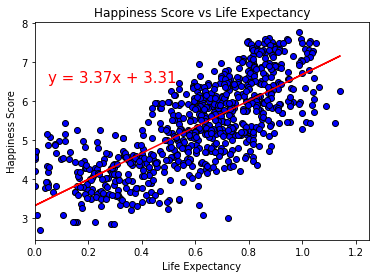

In [42]:
x_values = full_data_df['Health (Life Expectancy)']
y_values = full_data_df['Happiness Score']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="blue",
           edgecolors ="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.05,6.5),fontsize=15,color="red")
plt.title('Happiness Score vs Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Happiness Score')
plt.xlim(0,1.25)
print(f"The r-squared is: {rvalue**2}")
# plt.savefig("../output_data/fig5.png")
plt.show()

In [17]:
#Happiness score, country name, GDP -- calculate correlation coefficient and pull into df
#scatter plot 

full_data_df[['Happiness Score','Country','Economy (GDP per Capita)']]

,Happiness Score,Country,Economy (GDP per Capita)
0,7.587,Switzerland,1.396510
1,7.561,Iceland,1.302320
2,7.527,Denmark,1.325480
3,7.522,Norway,1.459000
4,7.427,Canada,1.326290
5,7.406,Finland,1.290250
6,7.378,Netherlands,1.329440
7,7.364,Sweden,1.331710
8,7.286,New Zealand,1.250180
9,7.284,Australia,1.333580


The r-squared is: 0.6229692274601595


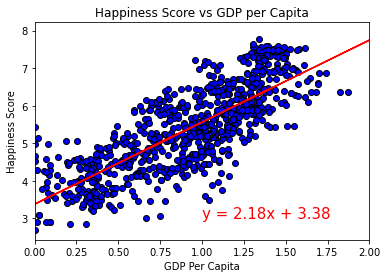

In [26]:
# Print out the r-squared value along with the plot.
x_values = full_data_df['Economy (GDP per Capita)']
y_values = full_data_df['Happiness Score']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="blue",
           edgecolors ="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,3),fontsize=15,color="red")
plt.title('Happiness Score vs GDP per Capita')
plt.xlabel('GDP Per Capita')
plt.ylabel('Happiness Score')
plt.xlim(0,2)
print(f"The r-squared is: {rvalue**2}")
# plt.savefig("../output_data/fig5.png")
plt.show()

In [19]:
#Generosity, country name, GDP -- calculate correlation coefficient and pull into df
#scatter plot
full_data_df[['Generosity','Country','Economy (GDP per Capita)']]

,Generosity,Country,Economy (GDP per Capita)
0,0.296780,Switzerland,1.396510
1,0.436300,Iceland,1.302320
2,0.341390,Denmark,1.325480
3,0.346990,Norway,1.459000
4,0.458110,Canada,1.326290
5,0.233510,Finland,1.290250
6,0.476100,Netherlands,1.329440
7,0.362620,Sweden,1.331710
8,0.475010,New Zealand,1.250180
9,0.435620,Australia,1.333580


The r-squared is: 0.000212007646384023


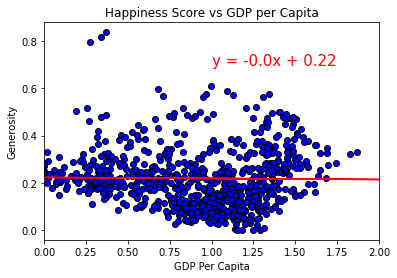

In [29]:
x_values = full_data_df['Economy (GDP per Capita)']
y_values = full_data_df['Generosity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="blue",
           edgecolors ="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,0.7),fontsize=15,color="red")
plt.title('Happiness Score vs GDP per Capita')
plt.xlabel('GDP Per Capita')
plt.ylabel('Generosity')
plt.xlim(0,2)
print(f"The r-squared is: {rvalue**2}")
# plt.savefig("../output_data/fig5.png")
plt.show()

James & Aline

Theme: Life Expectancy

Potential Questions: Is there a relationship between Healthy Life Expectancy and Perceptions of Corruption? Is Perceptions of Corruption affected by Freedom to make life choices?
Is Perceptions of Corruption affected by Freedom to make life choices?


In [27]:
#Life expectancy, corruption, freedom
#scatterplot

In [24]:
full_data_df[['Health (Life Expectancy)','Trust (Government Corruption)','Freedom']]

,Health (Life Expectancy),Trust (Government Corruption),Freedom
0,0.941430,0.419780,0.665570
1,0.947840,0.141450,0.628770
2,0.874640,0.483570,0.649380
3,0.885210,0.365030,0.669730
4,0.905630,0.329570,0.632970
5,0.889110,0.413720,0.641690
6,0.892840,0.318140,0.615760
7,0.910870,0.438440,0.659800
8,0.908370,0.429220,0.639380
9,0.931560,0.356370,0.651240


In [25]:
#life expectancy, happiness, GDP -- chaos ensues

full_data_df[['Health (Life Expectancy)','Happiness Score','Economy (GDP per Capita)']]

,Health (Life Expectancy),Happiness Score,Economy (GDP per Capita)
0,0.941430,7.587,1.396510
1,0.947840,7.561,1.302320
2,0.874640,7.527,1.325480
3,0.885210,7.522,1.459000
4,0.905630,7.427,1.326290
5,0.889110,7.406,1.290250
6,0.892840,7.378,1.329440
7,0.910870,7.364,1.331710
8,0.908370,7.286,1.250180
9,0.931560,7.284,1.333580


Susan

Theme: Region

Potential Questions:
Does region have an effect on Happiness score?

In [22]:
#Bar graph/stacked bar graph of happiness score overtime by region?
###If we want to only show countries with 5 years of data, remove those without 5 years of data

full_data_df[['Happiness Score','Region','Year']]

,Happiness Score,Region,Year
0,7.587,Western Europe,2015
1,7.561,Western Europe,2015
2,7.527,Western Europe,2015
3,7.522,Western Europe,2015
4,7.427,North America,2015
5,7.406,Western Europe,2015
6,7.378,Western Europe,2015
7,7.364,Western Europe,2015
8,7.286,Australia and New Zealand,2015
9,7.284,Australia and New Zealand,2015


In [ ]:
#Notes:
#BINNING?

#Happiness rank, top 10?